<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/final-updates/Loading_AlexNet_10_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========================================
# File Name : tomato_10_classes.ipynb
#
# Creation Date : Feburary 22, 2022
#
# Created By : Ivy Chung and Anoushka Gupta
# ========================================

"""Initializing required libraries"""

# so that we can mount google drive
from google.colab import drive

# numerical computation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import gc # garbage collector to free objects on demand

# file manipulation
import zipfile
import os
import shutil

# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
%matplotlib inline
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold

# tensorflow tools
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# other
import cv2

from tensorflow.keras import backend as K
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score

from random import randint

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the dataset zip file
dataset_name = 'Tomato Disease Dataset'
drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/'
working_dataset_address = os.path.join('/tmp/', dataset_name)
valid_dataset_address = os.path.join(working_dataset_address, 'valid')

zip_ref = zipfile.ZipFile(drive_dataset_address + dataset_name + '.zip', 'r')
zip_ref.extractall('/tmp/') # Extracts the files into the appropriate folder
zip_ref.close()

In [ ]:
# Removes the __MACOSX file that comes with zipping a file on Mac
try:
  shutil.rmtree('/tmp/__MACOSX')
except:
  pass

In [ ]:
# Function to extract all sub- file/directory names
def read_filenames(dir_path, file_bool = True):
  if file_bool: # list all files in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isfile(os.path.join(dir_path, f))]
  if not file_bool: # list all subfolders in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isdir(os.path.join(dir_path, f))]


In [ ]:
# getting classes
# classes = read_filenames(working_dataset_address,file_bool = False)
classes = ['Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___Target_Spot']

# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

In [ ]:
# Collect all image names
valid_img_names = [read_filenames(os.path.join(valid_dataset_address, classes[i])) for i in range(CLASS_SIZE)]

# making a np array of the images in pixel values
x_test = []
y_test = []

for i in range(CLASS_SIZE):
  for j in range(len(valid_img_names[i])):
    img_path = os.path.join(valid_dataset_address, classes[i], valid_img_names[i][j])
    try:
      img = Image.open(img_path)
      data = asarray(img) # convert image to numpy array
      x_test.append(data)
      y_test.append(classes[i])
    except:
      pass

print("Total test image count:", len(x_test))
x_test = np.asarray(x_test)
y_test = np.asarray(y_test).ravel()

Total test image count: 4585


In [ ]:
# convert our data vectors to the desired format
# Our x data vectors are four-dimensional, just as we wanted

# convert the labels be to int-encoded 
label_encoder = LabelEncoder()

# function to convert y data vectors int encoded class matrices
def convert_to_categorical(y_test, oneHot = True, makeArray = False):
  y_test = label_encoder.fit_transform(y_test)
  
  if oneHot:
    y_test = keras.utils.to_categorical(y_test, CLASS_SIZE)
  if makeArray:
    y_test = np.array([np.array([y]) for y in y_test])
  
  return y_test

# convert the label formatting
y_test = convert_to_categorical(y_test, False, True)

In [ ]:
# function to preprocess image
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [ ]:
# takes the test dataset partitions and returns a corresponding TensorFlow Dataset representation
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test))

# input pipeline
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Test size:',test_ds_size)

test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

Test size: 4585


In [ ]:
# load trained model 
base_save_path = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/Trained Models/'
save_path = base_save_path+'Tomato 10 Classes AlexNet New/'

Alexnet_model = keras.models.load_model(save_path)

# Alexnet_model.summary()

In [ ]:
# keras.utils.plot_model(Alexnet_model, show_shapes=True, show_layer_names=False)

In [ ]:
print("Evaluate loaded model")
results = Alexnet_model.evaluate(test_ds)
print("test loss", results[0])
print("test accuracy", results[1])

Evaluate loaded model
143/143 [==============================] - 8s 9ms/step - loss: 0.3704 - accuracy: 0.8979
test loss 0.37042132019996643
test accuracy 0.8979458212852478


In [ ]:
def process_image(image):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image

Generate predictions for sample
Original Image


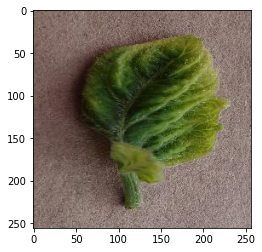

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Standardized Image


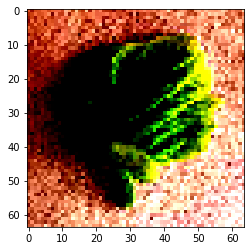

Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
print("Generate predictions for sample")

i = randint(0,len(x_test))
# original image
print("Original Image")
plt.imshow(x_test[i])
plt.show()

# standardizing and processing image
print("\nStandardized Image")
image = process_image(x_test[i])
plt.imshow(image)
plt.show()
image = tf.expand_dims(image, axis=0)

# making the prediction
y_pred = Alexnet_model.predict(image)
prediction = y_pred.argmax()
actual = y_test[i]

print('Prediction:', classes[prediction])
print('Actual:', classes[actual[0]])

In [ ]:
print("Showing predictions for a batch of samples")

for images, labels in test_ds.take(1):  # randomly takes one batch of of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

# i = 0
y_pred = Alexnet_model.predict(numpy_images)
for i in range(32):
  prediction = y_pred[i].argmax()
  actual = numpy_labels[i][0]
  print('Prediction:', prediction)
  print('Actual:', actual)  

Showing predictions for a batch of samples
Prediction: 0
Actual: 0
Prediction: 6
Actual: 5
Prediction: 0
Actual: 0
Prediction: 7
Actual: 7
Prediction: 4
Actual: 8
Prediction: 8
Actual: 8
Prediction: 5
Actual: 5
Prediction: 7
Actual: 1
Prediction: 2
Actual: 2
Prediction: 7
Actual: 7
Prediction: 6
Actual: 6
Prediction: 7
Actual: 7
Prediction: 9
Actual: 9
Prediction: 4
Actual: 4
Prediction: 7
Actual: 7
Prediction: 3
Actual: 3
Prediction: 3
Actual: 3
Prediction: 7
Actual: 7
Prediction: 1
Actual: 1
Prediction: 5
Actual: 5
Prediction: 4
Actual: 4
Prediction: 9
Actual: 9
Prediction: 4
Actual: 4
Prediction: 5
Actual: 5
Prediction: 3
Actual: 3
Prediction: 2
Actual: 2
Prediction: 8
Actual: 8
Prediction: 0
Actual: 0
Prediction: 2
Actual: 2
Prediction: 1
Actual: 6
Prediction: 4
Actual: 4
Prediction: 5
Actual: 5


In [ ]:
# real_images_drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/images-real/'
# img_name = 'nvcamtest_21397_s00_00000.jpg'

# img = Image.open(real_images_drive_dataset_address+img_name)
# plt.imshow(img)
# plt.show()
# img = asarray(img) # convert image to numpy array

# img = process_image(img)
# plt.imshow(img)
# plt.show()

# img = tf.expand_dims(img, axis=0)

# y_pred_img = Alexnet_model.predict(img)
# prediction = y_pred_img.argmax()

# print('Prediction:', classes[prediction])